#  <center>Beautifulsoup in Pandas  </center>

<br>
<center>Dejan Križaj, 2019</center>

**Namen:** Zvezek (Notebook) je namenjen seznanjanju študentov z uporabo Jupytra za vnos podatkov iz spleta in njihovo predstavitvijo. To vključuje predvsem osnovni prikaz uporabe modulov Beautifulsoup in Pandas. 

**Zvezek se nanaša na:**
* Impedančna spektroskopija


<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na Githubu na https://github.com/osnove/Dodatno/
</div>

Ta zvezek je v bistvu dodatek k zvezku Impedančna spektroskopija, v katerem smo  prikazali uporabo impedančne spektroskopije za analizo kemijskih procesov in bioloških sistemov. 

Beautifulsoup in Pandas sta dve knjižnici (modula), ki omogočata dodatno funkcionalnost uporabe Pythona. S pomočjo Beautifulsoup lahko razčlenimo (ang. parsing) določeno datoteko in iz nje izluščimo kar nas zanima. Recimo, pri dielektrični spektroskopiji smo uporabili podatke iz tabele na strani http://niremf.ifac.cnr.it/docs/DIELECTRIC/AppendixC.html. Podatke za en primer (za model dielektričnih lastnosti krvi) smo "na roko" prepisali v spremenljivke v Jupytru. Z nekaj ukaznimi vrsticamo to lahko naredimo programsko, pa ne le za eno samo snov pač pa povlečemo celotno tabelo in iz nje izvlečemo podatke. Beautifulsoup deluje kot razčlenjevalec, za oblikovanje v uporabno tabelo in delo s tabelo pa uporabimo še modul Pandas. 

V podpoglavju 1.1 najprej prikažemo "klasičen" način obravnave, kjer parametre za model pridobimo iz tabele na spletni strani, kasneje pa to naredimo programsko.

## Dielektrične lastnosti bioloških tkiv


Cole-Cole model ni primeren le za modeliranje dielektričnih lastnosti "preprostih" dielektrikov, pač pa v razširjeni obliki zelo dobro modelira tudi dielektrične lastnosti bioloških tkiv. Trenutno, v bistvu že kar nekaj časa, je v veljavi več-parametrski model, ki sta ga predlagala Gabriel & Gabriel () in temelji na uporabi več osnovnih Cole-Cole enačb. S tem omogoči, da se modelira relaksacijske mehanizme v bioloških sistemih, ki nastopajo pri več različnih frekvencah. Model, ki sta ga uporabila 

$$\underline{\epsilon} =  \epsilon _{\infty} + \sum_{n=1}^{4} \frac{\Delta \epsilon_n}{1+(j\omega\tau _n)^{1-\alpha _n}} + \frac{\gamma }{j \omega \epsilon _0}$$. 

Osnovni izris grafa prikazuje spodnja celica.

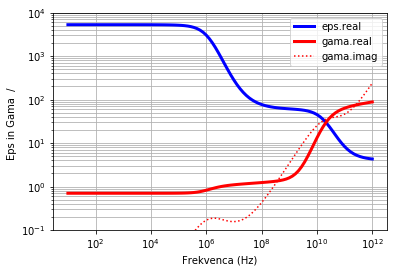

In [494]:
## več parametrski Cole-Cole model
ef=4.000
del1=56
tau1=8.377e-12
alf1=.1
del2=5200
tau2=132.629e-9
alf2=.1
sig=.7
del3=0.7
tau3=159.155
alf3=0.2
del4=0
tau4=15e-3
alf4=0
e0=8.854e-12

eksponent=np.linspace(1,12,100) # izdelamo 10 točk od 0 do 2000, linearno
freq=10**(eksponent)
omega=2*np.pi*freq

eps=ef+del1/(1+(1j*omega*tau1)**(1-alf1))+del2/(1+(1j*omega*tau2)**(1-alf2))
eps=eps+del3/(1+(1j*omega*tau3)**(1-alf4))+del4/(1+(1j*omega*tau4)**(1-alf4))+sig/(1j*omega*e0)
sigma=1j*eps*omega*e0


plt.xlabel('Frekvenca (Hz)')
plt.ylabel('Eps in Gama  / ') 
plt.loglog(freq,(eps).real, color='b',linewidth=3,label='eps.real')
plt.loglog(freq,sigma.real, color='r',linewidth=3,label='gama.real')
plt.loglog(freq,(sigma).imag, color='r',linestyle=':',label='gama.imag')

plt.grid(True,which="both")
plt.ylim(.1,1e4)
plt.legend() # klikni puščico za razširitev

## Beautiful Soup

V naslednjih vrsticah bomo povlekli podatke za dielektrični model iz html tabele na strani 
http://niremf.ifac.cnr.it/docs/DIELECTRIC/AppendixC.html. V ta namen bomo uporabili modul requests, s pomočjo katerega bomo prenesli vsebino datoteke iz spleta v spremenljivko res.
Nato bomo uporabili modul BeautifulSoup, s pomočjo katerega bomo analizirali vsebino datoteke (z razčlenjevalnikom (parserjem) xlml. 

Če modul Beautifulsoup ni nameščen na računalniku, ga je potrebno predhodno namestiti. 
Lahko tudi v ukazni vrstici Jupytra z ukazom !pip install bs4. 
Enako je potrebno narediti tudi za pandas in tudi za lxml.



In [368]:
import requests
from bs4 import BeautifulSoup

res = requests.get("http://niremf.ifac.cnr.it/docs/DIELECTRIC/AppendixC.html") # potegne file iz spleta
soup = BeautifulSoup(res.content,'lxml') # sparsa vsebino z lxml

table2 = soup.find_all('table') # poiščemo tabelo
table2[0] # izpišemo tabelo, da vidimo, če je prava

<table border="2" bordercolor="#777777" color="#000000" width="100%">
<tr>
<td width="84">Tissue Type \ Parameter </td>
<td width="30">ef </td>
<td width="30">del1</td>
<td width="30">tau1 (ps) </td>
<td width="30">alf1 </td>
<td width="30">del2</td>
<td width="30">tau2 (ns)</td>
<td width="30">alf2 </td>
<td width="30">sig</td>
<td width="30">del3</td>
<td width="30">tau3 (us) </td>
<td width="30">alf3</td>
<td width="30">del4</td>
<td width="30">tau4 (ms) </td>
<td width="30">alf4</td>
</tr>
<tr>
<td width="84"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
<td width="30"></td>
</tr>
<tr>
<td width="84"><font color="#000000">Aorta</font></td>
<td width="30"><font color="#000000">4.000 </font></td>
<td width="30"><font color="#000000">40.00 </font></td>
<td

Če se je izpisala tabela v obliki html, smo na dobri poti. Sedaj je potrebno razdelati to tabelo, da se iz nje izvleče podatke. V ta namen uporabimo metodo findAll, kjer bomo poiskali indekse, kjer nastopa oznaka za začetek vrste "tr" in začetek celice "td". Nato shranjujemo po 16 vrednosti iz ene vrste v spremenljivko record in nato vse vrste v records.

Nato s pomočjo metode DataFrame znotraj modula Pandas kreiramo Dataframe, ki je neke vrste dvodimenzionalni niz z dodatnimi možnostmi indeksiranja itd. 

In [485]:
# Poiščem vrednosti v tabeli in jih shranim v niz records
import pandas as pd
records = []
for tr in table2[0].findAll("tr"):
    trs = tr.findAll("td")
    record = []
    for i in range(15): # 16 stolpcev v vrsti shranim v record
        record.append(trs[i].text)
    records.append(record) # zložim vrste v records

df = pd.DataFrame(data=records) # naredim DataFrame s Pandas
df # izrišem DataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Tissue Type \ Parameter,ef,del1,tau1 (ps),alf1,del2,tau2 (ns),alf2,sig,del3,tau3 (us),alf3,del4,tau4 (ms),alf4
1,,,,,,,,,,,,,,,
2,Aorta,4.000,40.00,8.842,0.100,50,3.183,0.100,0.250,1.00E+5,159.155,0.200,1.00E+7,1.592,0.000
3,Bladder,2.500,16.00,8.842,0.100,400,159.155,0.100,0.200,1.00E+5,159.155,0.200,1.00E+7,15.915,0.000
4,Blood,4.000,56.00,8.377,0.100,5200,132.629,0.100,0.700,0.00E+0,159.155,0.200,0.00E+0,15.915,0.000
5,Bone (Cancellous),2.500,18.00,13.263,0.220,300,79.577,0.250,0.070,2.00E+4,159.155,0.200,2.00E+7,15.915,0.000
6,Bone (Cortical),2.500,10.00,13.263,0.200,180,79.577,0.200,0.020,5.00E+3,159.155,0.200,1.00E+5,15.915,0.000
7,,,,,,,,,,,,,,,
8,Bone Marrow (Infiltrated),2.500,9.00,14.469,0.200,80,15.915,0.100,0.100,1.00E+4,1591.549,0.100,2.00E+6,15.915,0.100
9,Bone Marrow (Not Infiltrated)\n,2.500,3.00,7.958,0.200,25,15.915,0.100,0.001,5.00E+3,1591.549,0.100,2.00E+6,15.915,0.100


Če je vse potekalo OK, smo dobili izpis DataFrame-a z 53 vrsticami in 15 stolpci. Poglejmo si nekaj osnovnih ukazov za delo z Dataframe-om.

In [486]:
# Za osnovno delo z Dataframe, uporabi print za izpis, sicer izpiše le rezultat zadnje vrstice
print(type(df)) # ugotovimo tip spremenljivke
print(df.values[0]) # izpis prve vrstice
print(df.values[2][1]) # tretja vrstica, druga kolona
df.values # celoten niz

<class 'pandas.core.frame.DataFrame'>
['Tissue Type \\ Parameter ' 'ef ' 'del1' 'tau1 (ps) ' 'alf1 ' 'del2'
 'tau2 (ns)' 'alf2 ' 'sig' 'del3' 'tau3 (us) ' 'alf3' 'del4' 'tau4 (ms) '
 'alf4']
4.000 


array([['Tissue Type \\ Parameter ', 'ef ', 'del1', 'tau1 (ps) ',
        'alf1 ', 'del2', 'tau2 (ns)', 'alf2 ', 'sig', 'del3',
        'tau3 (us) ', 'alf3', 'del4', 'tau4 (ms) ', 'alf4'],
       ['', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
       ['Aorta', '4.000 ', '40.00 ', '8.842 ', '0.100 ', '50 ', '3.183 ',
        '0.100 ', '0.250 ', '1.00E+5 ', '159.155 ', '0.200 ', '1.00E+7 ',
        '1.592 ', '0.000 '],
       ['Bladder', '2.500 ', '16.00 ', '8.842 ', '0.100 ', '400 ',
        '159.155 ', '0.100 ', '0.200 ', '1.00E+5 ', '159.155 ', '0.200 ',
        '1.00E+7 ', '15.915 ', '0.000 '],
       ['Blood', '4.000 ', '56.00 ', '8.377 ', '0.100 ', '5200 ',
        '132.629 ', '0.100 ', '0.700 ', '0.00E+0 ', '159.155 ', '0.200 ',
        '0.00E+0 ', '15.915 ', '0.000 '],
       ['Bone (Cancellous) ', '2.500 ', '18.00 ', '13.263 ', '0.220 ',
        '300 ', '79.577 ', '0.250 ', '0.070 ', '2.00E+4 ', '159.155 ',
        '0.200 ', '2.00E+7 ', '15.915 ', '0.000 '],
      

Za boljše delo je potrebno določiti indeks, po katerem bomo lahko naslavljali vrstice. Trenutno je indeks kar na začetnem stolpcu, določenim s črkami od 0 do 53. Mi želimo naslavljati vrstice z imeni snovi, npr. Aorta, Bladder itd.

In [487]:
df.set_index(0, inplace=True) # nastavimo indeks na stolpec z imeni snovi
df # na začetku ni več številk, indeksi so izpisani bold
# če to vrstico zaženeš še enkrat boš naredil napako, ker črke 0 ni več v prvi vrsti. 
# V tem primeru se moraš vrniti na začetek in še enkrat prebrati tabelo

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,
Tissue Type \ Parameter,ef,del1,tau1 (ps),alf1,del2,tau2 (ns),alf2,sig,del3,tau3 (us),alf3,del4,tau4 (ms),alf4
,,,,,,,,,,,,,,
Aorta,4.000,40.00,8.842,0.100,50,3.183,0.100,0.250,1.00E+5,159.155,0.200,1.00E+7,1.592,0.000
Bladder,2.500,16.00,8.842,0.100,400,159.155,0.100,0.200,1.00E+5,159.155,0.200,1.00E+7,15.915,0.000
Blood,4.000,56.00,8.377,0.100,5200,132.629,0.100,0.700,0.00E+0,159.155,0.200,0.00E+0,15.915,0.000
Bone (Cancellous),2.500,18.00,13.263,0.220,300,79.577,0.250,0.070,2.00E+4,159.155,0.200,2.00E+7,15.915,0.000
Bone (Cortical),2.500,10.00,13.263,0.200,180,79.577,0.200,0.020,5.00E+3,159.155,0.200,1.00E+5,15.915,0.000
,,,,,,,,,,,,,,
Bone Marrow (Infiltrated),2.500,9.00,14.469,0.200,80,15.915,0.100,0.100,1.00E+4,1591.549,0.100,2.00E+6,15.915,0.100


Sedaj lahko naslavljaš posamezno vrstico in iz nje izvečeš podatke. (Za več o delu z Dataframe si poglej na spletu, za začetek npr. https://www.geeksforgeeks.org/python-pandas-dataframe/)

In [398]:
print(df.index.tolist()[2:10]) # spremeniš indeks v niz, bomo rabili v kratkem

['Aorta', 'Bladder', 'Blood', 'Bone (Cancellous) ', 'Bone (Cortical) ', '', 'Bone Marrow (Infiltrated) ', 'Bone Marrow (Not Infiltrated)\n']


In [489]:
vrstica = df.loc['Blood'] # vrednosti vrstice z indeksom Blood
print(vrstica) # izpis
print(vrstica[1]) # prvi člen

1       4.000 
2       56.00 
3       8.377 
4       0.100 
5        5200 
6     132.629 
7       0.100 
8       0.700 
9     0.00E+0 
10    159.155 
11      0.200 
12    0.00E+0 
13     15.915 
14      0.000 
Name: Blood, dtype: object
4.000 


Sedaj smo pripravljeni, da uporabimo podatke za izrise. Npr., tvorimo niz snovi, v katere vpišemo snov, katerega model želimo izpisati.

Preden uporabimo podatke, jih moramo spremeniti iz tipa string v float. To se da narediti na več načinov, mi bomo uporabili najbolj enostavnega, z uporabo funkcije float.

Izris bo narejen za snov kri, lahko pa enostavno zamenjamo snov, npr. za "Aorta" in na grafu bo potek permitivnosti in prevodnosti za aorto.

4.0 56.0 8.377000000000001e-12 0.1 5200.0 1.32629e-07 0.1 0.0 0.000159155 0.2 0.0 0.015915 0.0


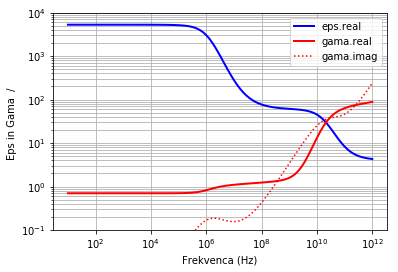

In [490]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

snov=['Blood']
v = df.loc[snov]  # najde vrstico in shrani vrednosti v niz
#print(v)

ef=float(v[1])
del1=float(v[2])
tau1=float(v[3])*1e-12
alf1=float(v[4])
del2=float(v[5])
tau2=float(v[6])*1e-9
alf2=float(v[7])
sig=float(v[8])
del3=float(v[9])
tau3=float(v[10])*1e-6
alf3=float(v[11])
del4=float(v[12])
tau4=float(v[13])*1e-3
alf4=float(v[14])
print(ef,del1, tau1, alf1,del2,tau2,alf2,del3,tau3,alf3,del4,tau4,alf4)
e0=8.854e-12

eksponent=np.linspace(1,12,100) # izdelamo 10 točk od 0 do 2000, linearno
freq=10**(eksponent)
omega=2*np.pi*freq

eps=ef+del1/(1+(1j*omega*tau1)**(1-alf1))+del2/(1+(1j*omega*tau2)**(1-alf2))
eps=eps+del3/(1+(1j*omega*tau3)**(1-alf4))+del4/(1+(1j*omega*tau4)**(1-alf4))+sig/(1j*omega*e0)
sigma=1j*eps*omega*e0


plt.xlabel('Frekvenca (Hz)')
plt.ylabel('Eps in Gama  / ') 
plt.loglog(freq,(eps).real, color='b',linewidth=2,label='eps.real')
plt.loglog(freq,sigma.real, color='r',linewidth=2,label='gama.real')
plt.loglog(freq,(sigma).imag, color='r',linestyle=':',label='gama.imag')


plt.grid(True,which="both")
plt.ylim(.1,1e4)
plt.legend()

## Izbira s spustnim seznamom - dropdown list

Sedaj lahko dodamo še spustni seznam, v katerem bodo imena snovi. Ob izbiri pa izrišemo ustrezen graf.

Najprej si oglejmo, kako se naredi spustni seznam z uporabo ukaza widgets iz modula ipywitgets.

In [491]:
import ipywidgets as widgets

lista=df.index.tolist()[2:53] # iz indeksa naredim niz za izpustni seznam
#print(lista)

#Tvorim spustni seznam  lista in izbranim default prikazom Aorta
w = widgets.Dropdown( 
    options=lista,
    value='Aorta',
    description='Task:',
)

# Ob spremembi izbire izpišem novo izbiro
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
        print(w.value)

w.observe(on_change)

display(w)

Dropdown(description='Task:', options=('Aorta', 'Bladder', 'Blood', 'Bone (Cancellous) ', 'Bone (Cortical) ', …

Sedaj, ko imamo izbirni seznam, ga le še povežemo z novim izrisom grafa za izbrano snov.

In [492]:
import ipywidgets as widgets

lista=df.index.tolist()[2:53]
#print(lista)

w = widgets.Dropdown(
    options=lista,
    value='Aorta',
    description='Task:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
        print(w.value)
        plot()  # ob spremembi se izvrši funkcija plot(), ki izriše graf

def plot():
    snov=w.value #dobim vrednost od izbire 
    v = df.loc[snov]  # najde vrstico in shrani vrednosti v niz
    #print(v)

    ef=float(v[1])
    del1=float(v[2])
    tau1=float(v[3])*1e-12
    alf1=float(v[4])
    del2=float(v[5])
    tau2=float(v[6])*1e-9
    alf2=float(v[7])
    sig=float(v[8])
    del3=float(v[9])
    tau3=float(v[10])*1e-6
    alf3=float(v[11])
    del4=float(v[12])
    tau4=float(v[13])*1e-3
    alf4=float(v[14])
    e0=8.854e-12

    eksponent=np.linspace(1,12,100) # izdelamo 10 točk od 0 do 2000, linearno
    freq=10**(eksponent)
    omega=2*np.pi*freq

    eps=ef+del1/(1+(1j*omega*tau1)**(1-alf1))+del2/(1+(1j*omega*tau2)**(1-alf2))
    eps=eps+del3/(1+(1j*omega*tau3)**(1-alf4))+del4/(1+(1j*omega*tau4)**(1-alf4))+sig/(1j*omega*e0)
    sigma=1j*eps*omega*e0
    
    plt.title(snov)
    plt.xlabel('Frekvenca (Hz)')
    plt.ylabel('Eps in Gama  / ') 
    plt.loglog(freq,(eps).real, color='b',linewidth=3,label='eps.real')
    plt.loglog(freq,sigma.real, color='r',linewidth=3,label='gama.real')
    plt.loglog(freq,(sigma).imag, color='r',linestyle=':',label='gama.imag')

    plt.grid(True,which="both")
    plt.ylim(.1,1e4)
    plt.legend()
    
w.observe(on_change)
display(w)

Dropdown(description='Task:', options=('Aorta', 'Bladder', 'Blood', 'Bone (Cancellous) ', 'Bone (Cortical) ', …

## Zdaj pa ti

Graf je preveč natlačen, če bi želeli pogledati dielektrične lastnosti več snovi hkrati. Lahko pa si zamislimo drugače oblikovan graf, na katerem bi recimo prikazovali le permitivnost (realni del kompleksne dielektričnosti) ali pa le prevodnost. Poskusi izdelati kodo, kjer boš lahko izbral nekaj snovi in za te snovi izrisal omenjene grafe. (Ena od možnih rešitev je na koncu strani)

## Zaključek

Ta zvezek se nanaša na poglavje o impedančni spektroskopiji, ki ga dopolnjuje z načinom prikaza dielektričnih lastnosti bioloških tkiv na bolj "eleganten" način. In sicer tako, da uporabi modula BeautifulSoup in Pandas za obdelavo spletne strani, iz katere izvlečemo tabelo s parametri in jo pretvorimo v Dataframe tablo in nato iz nje izvlečemo parametre za izbrano snov. Nato uporabimo še interaktivni gradnik v obliki izvlečnega seznama, s pomočjo katerega izberemo želen izris grafa.

V zvezku ne obravnavamo celovito modula BeautifulSoup in še manj Pandas, ki omogočata še marsikaj drugega. Na primer, tabela je bila v našem primeru v originalni html datoteki zapisana s html sintakso, lahko pa bi bila tudi v obliki json ali xml in podobno. Za vsak konkreten primer je potrebno pogledati html obliko dokumenta (običajno z desnim klikom miške in izbiro Page source) in v zmedi html zapisa poiskati, kako so zapisani originalni podatki.Ko pač nekaj konkretnega potrebujete, je potrebno malo pobrskati po spletu in najti usttrezno rešitev.


## Rešitve

In [493]:
import ipywidgets as widgets
from IPython.display import clear_output

lista=df.index.tolist()[2:53]
#print(lista)

selector = widgets.SelectMultiple(
options=lista,
value=[lista[1]],
rows=10,
description='Variables',
disabled=False)

output = widgets.Output()

display(selector)
display(output)

def plot(snovi):
    i=-1
    lstyle=['-','-.','--',':']
    for snov in snovi:
        i=i+1
        v = df.loc[snov]  # najde vrstico in shrani vrednosti v niz
        ef=float(v[1])
        del1=float(v[2])
        tau1=float(v[3])*1e-12
        alf1=float(v[4])
        del2=float(v[5])
        tau2=float(v[6])*1e-9
        alf2=float(v[7])
        sig=float(v[8])
        del3=float(v[9])
        tau3=float(v[10])*1e-6
        alf3=float(v[11])
        del4=float(v[12])
        tau4=float(v[13])*1e-3
        alf4=float(v[14])
        #print(ef,del1, tau1, alf1,del2,tau2,alf2,del3,tau3,alf3,del4,tau4,alf4)
        e0=8.854e-12

        eksponent=np.linspace(1,12,100) # izdelamo 10 točk od 0 do 2000, linearno
        freq=10**(eksponent)
        omega=2*np.pi*freq

        eps=ef+del1/(1+(1j*omega*tau1)**(1-alf1))+del2/(1+(1j*omega*tau2)**(1-alf2))
        eps=eps+del3/(1+(1j*omega*tau3)**(1-alf4))+del4/(1+(1j*omega*tau4)**(1-alf4))+sig/(1j*omega*e0)
        sigma=1j*eps*omega*e0

        plt.loglog(freq,(eps).real, color='b',linestyle=lstyle[i],linewidth=2,label='eps '+snov)
        plt.loglog(freq,sigma.real, color='r',linestyle=lstyle[i],linewidth=2,label='gama' + snov)

    plt.xlabel('Frekvenca (Hz)')
    plt.ylabel('Eps in Gama  / ')     
    plt.grid(True,which="both")
    plt.ylim(.1,1e4)
    plt.legend()
    plt.title(snovi)
    
def multiplot(widg):
    choices = widg['new']
    output.clear_output(wait=False)
    
    if len(choices)>4: 
        print('Ne izberi več kot štiri snovi')
    else:
        plot(choices)


selector.observe(multiplot, names='value')


SelectMultiple(description='Variables', index=(1,), options=('Aorta', 'Bladder', 'Blood', 'Bone (Cancellous) '…

Output()